In [1]:
from IPython.display import Image

In [2]:
from pyUML import Graph, UMLClass

In [3]:
def print_and_save(graph, name):
    print(graph.to_string())
    graph.write_raw(f"{name}.dot")
    graph.write(f"{name}.png", "dot", "png")

In [4]:
graph = Graph('pyUML')

In [5]:
graph_dot = UMLClass(
    "pydot.Dot"
)

In [6]:
graph.add_class(graph_dot)

In [7]:
print_and_save(graph, "dot_only")

digraph pyUML {
"pydot.Dot" [label="{pydot.Dot||}", shape=record];
}



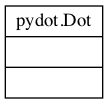

In [8]:
Image("./dot_only.png")

In [9]:
graph_class = UMLClass(
    "GraphClass",
    caption="Graph",
    methods=["add_aggregation()", "add_class()", "add_classes()", 
             "add_composition()", "add_edge()", "add_implementation()"]
)
graph.add_classes(graph_class)
print_and_save(graph, "dot_and_graph")

digraph pyUML {
"pydot.Dot" [label="{pydot.Dot||}", shape=record];
GraphClass [label="{Graph||+ add_aggregation()\l+ add_class()\l+ add_classes()\l+ add_composition()\l+ add_edge()\l+ add_implementation()\l}", shape=record];
}



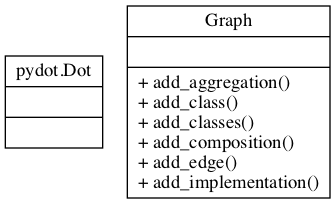

In [10]:
Image("./dot_and_graph.png")

In [11]:
graph.add_implementation(graph_class, graph_dot)
print_and_save(graph, "graph_implements_dot")

digraph pyUML {
"pydot.Dot" [label="{pydot.Dot||}", shape=record];
GraphClass [label="{Graph||+ add_aggregation()\l+ add_class()\l+ add_classes()\l+ add_composition()\l+ add_edge()\l+ add_implementation()\l}", shape=record];
"pydot.Dot" -> GraphClass  [arrowtail=onormal, dir=back];
}



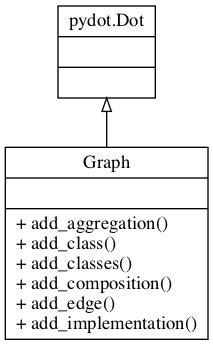

In [12]:
Image("./graph_implements_dot.png")

In [13]:
node = UMLClass(
    "pydot.Node"
)
graph.add_class(node)
uml_class = UMLClass(
    "UMLClass",
    attributes={
        "public": {
            "name": "string",
            "caption": "string"},
        "private": {
            "_attributes": "dict[dict]",
            "_methods": "dict[list]"
        }
    },
    methods={
        "public": ["add_attribute()", "add_attributes()", "add_method()",
             "add_methods()", "update_content()"],
        "private": ["_render_attributes()", "_render_methods()", "_get_source_sep()"]
    })
graph.add_class(uml_class)
graph.add_implementation(uml_class, node)
print_and_save(graph, "with_UMLClass")

digraph pyUML {
"pydot.Dot" [label="{pydot.Dot||}", shape=record];
GraphClass [label="{Graph||+ add_aggregation()\l+ add_class()\l+ add_classes()\l+ add_composition()\l+ add_edge()\l+ add_implementation()\l}", shape=record];
"pydot.Dot" -> GraphClass  [arrowtail=onormal, dir=back];
"pydot.Node" [label="{pydot.Node||}", shape=record];
UMLClass [label="{UMLClass|+ name : string\l+ caption : string\l- _attributes : dict[dict]\l- _methods : dict[list]\l|+ add_attribute()\l+ add_attributes()\l+ add_method()\l+ add_methods()\l+ update_content()\l- _render_attributes()\l- _render_methods()\l- _get_source_sep()\l}", shape=record];
"pydot.Node" -> UMLClass  [arrowtail=onormal, dir=back];
}



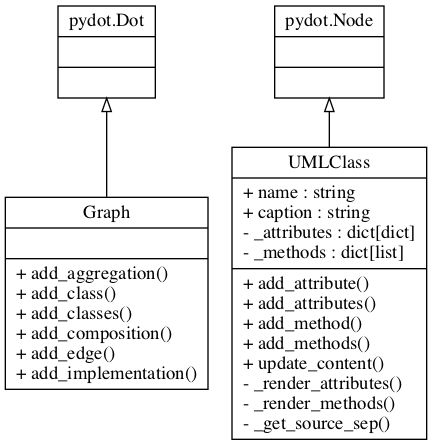

In [14]:
Image("./with_UMLClass.png")

In [15]:
uml_class_with_id = UMLClass(
    "UMLClassWithPublicIntID")
graph.add_class(uml_class_with_id)
graph.add_implementation(uml_class_with_id, uml_class)
print_and_save(graph, "with_UMLClassWithPublicIntID")

digraph pyUML {
"pydot.Dot" [label="{pydot.Dot||}", shape=record];
GraphClass [label="{Graph||+ add_aggregation()\l+ add_class()\l+ add_classes()\l+ add_composition()\l+ add_edge()\l+ add_implementation()\l}", shape=record];
"pydot.Dot" -> GraphClass  [arrowtail=onormal, dir=back];
"pydot.Node" [label="{pydot.Node||}", shape=record];
UMLClass [label="{UMLClass|+ name : string\l+ caption : string\l- _attributes : dict[dict]\l- _methods : dict[list]\l|+ add_attribute()\l+ add_attributes()\l+ add_method()\l+ add_methods()\l+ update_content()\l- _render_attributes()\l- _render_methods()\l- _get_source_sep()\l}", shape=record];
"pydot.Node" -> UMLClass  [arrowtail=onormal, dir=back];
UMLClassWithPublicIntID [label="{UMLClassWithPublicIntID||}", shape=record];
UMLClass -> UMLClassWithPublicIntID  [arrowtail=onormal, dir=back];
}



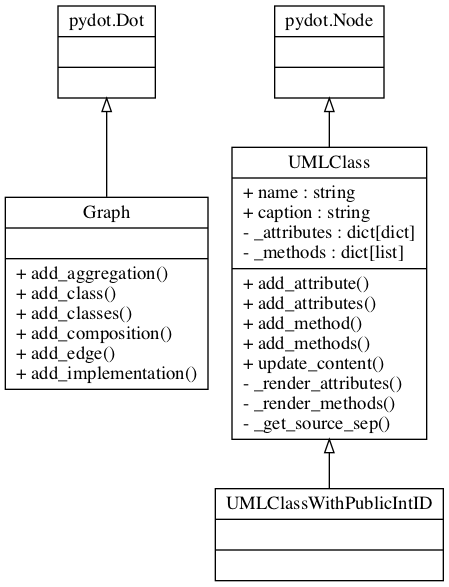

In [16]:
Image("./with_UMLClassWithPublicIntID.png")

In [17]:
edge = UMLClass(
    "pydot.Edge")
association = UMLClass(
    "Association",
    methods=["set_multiplicity()"])
implementation = UMLClass(
    "Implementation")
aggregation = UMLClass(
    "Aggregation")
composition = UMLClass(
    "Composition")
graph.add_classes(edge, association, implementation, aggregation, composition)
graph.add_implementation(association, edge)
graph.add_implementation(implementation, association)
graph.add_implementation(aggregation, association)
graph.add_implementation(composition, aggregation)

print_and_save(graph, "with_associations")

digraph pyUML {
"pydot.Dot" [label="{pydot.Dot||}", shape=record];
GraphClass [label="{Graph||+ add_aggregation()\l+ add_class()\l+ add_classes()\l+ add_composition()\l+ add_edge()\l+ add_implementation()\l}", shape=record];
"pydot.Dot" -> GraphClass  [arrowtail=onormal, dir=back];
"pydot.Node" [label="{pydot.Node||}", shape=record];
UMLClass [label="{UMLClass|+ name : string\l+ caption : string\l- _attributes : dict[dict]\l- _methods : dict[list]\l|+ add_attribute()\l+ add_attributes()\l+ add_method()\l+ add_methods()\l+ update_content()\l- _render_attributes()\l- _render_methods()\l- _get_source_sep()\l}", shape=record];
"pydot.Node" -> UMLClass  [arrowtail=onormal, dir=back];
UMLClassWithPublicIntID [label="{UMLClassWithPublicIntID||}", shape=record];
UMLClass -> UMLClassWithPublicIntID  [arrowtail=onormal, dir=back];
"pydot.Edge" [label="{pydot.Edge||}", shape=record];
Association [label="{Association||+ set_multiplicity()\l}", shape=record];
Implementation [label="{Implementation|

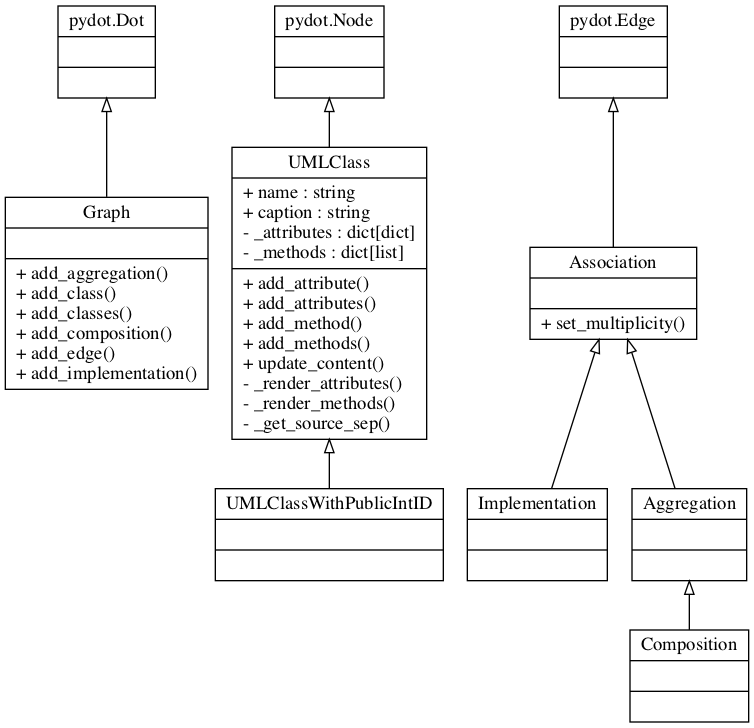

In [18]:
Image("./with_associations.png")

In [19]:
graph.add_composition(node, graph_dot, multiplicity_parent=1, multiplicity_child="1..*")
graph.add_composition(edge, graph_dot, multiplicity_parent=1, multiplicity_child="0..*")
graph.add_composition(association, graph_class, multiplicity_parent=1, multiplicity_child="0..*")

print_and_save(graph, "with_compositions")

digraph pyUML {
"pydot.Dot" [label="{pydot.Dot||}", shape=record];
GraphClass [label="{Graph||+ add_aggregation()\l+ add_class()\l+ add_classes()\l+ add_composition()\l+ add_edge()\l+ add_implementation()\l}", shape=record];
"pydot.Dot" -> GraphClass  [arrowtail=onormal, dir=back];
"pydot.Node" [label="{pydot.Node||}", shape=record];
UMLClass [label="{UMLClass|+ name : string\l+ caption : string\l- _attributes : dict[dict]\l- _methods : dict[list]\l|+ add_attribute()\l+ add_attributes()\l+ add_method()\l+ add_methods()\l+ update_content()\l- _render_attributes()\l- _render_methods()\l- _get_source_sep()\l}", shape=record];
"pydot.Node" -> UMLClass  [arrowtail=onormal, dir=back];
UMLClassWithPublicIntID [label="{UMLClassWithPublicIntID||}", shape=record];
UMLClass -> UMLClassWithPublicIntID  [arrowtail=onormal, dir=back];
"pydot.Edge" [label="{pydot.Edge||}", shape=record];
Association [label="{Association||+ set_multiplicity()\l}", shape=record];
Implementation [label="{Implementation|

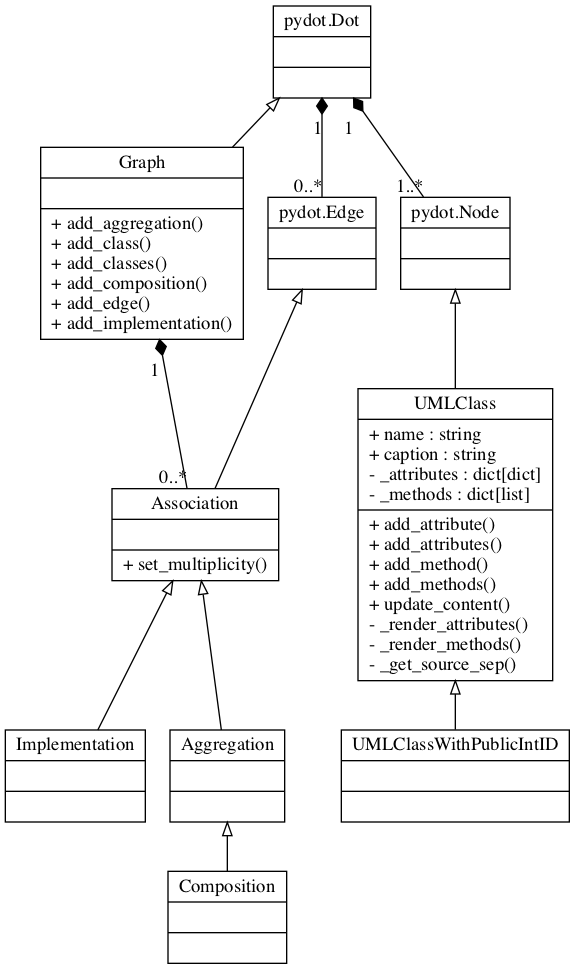

In [20]:
Image("with_compositions.png")